In [1]:
!pip install pyforest

In [1]:
lazy_imports()

['from pathlib import Path',
 'import plotly as py',
 'from sklearn.manifold import TSNE',
 'import xgboost as xgb',
 'import matplotlib as mpl',
 'import statistics',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import spacy',
 'from openpyxl import load_workbook',
 'import dash',
 'import seaborn as sns',
 'import gensim',
 'import tensorflow as tf',
 'from dask import dataframe as dd',
 'import lightgbm as lgb',
 'import keras',
 'import altair as alt',
 'from pyspark import SparkContext',
 'import pandas as pd',
 'from sklearn.ensemble import RandomForestRegressor',
 'import pickle',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.model_selection import train_test_split',
 'import matplotlib.pyplot as plt',
 'from sklearn.ensemble import RandomForestClassifier',
 'import sys',
 'import awswrangler as wr',
 'import nltk',
 'import bokeh',
 'import datetime as dt',
 'import os',
 'import pydot',
 'from sklearn import svm',
 'from sklearn.fea

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
train.shape
test.shape

(4209, 378)

(4209, 377)

In [6]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


Question 1 - If for any column(s), the variance is equal to zero, then you need to remove those variable(s)

In [7]:
var_train=train.var()

In [8]:
var_train=pd.DataFrame(data=var_train, columns=['variance'])

<IPython.core.display.Javascript object>

In [9]:
var_train

,variance
ID,5.941936e+06
y,1.607667e+02
X10,1.313092e-02
X11,0.000000e+00
X12,6.945713e-02
...,...
X380,8.014579e-03
X382,7.546747e-03
X383,1.660732e-03
X384,4.750593e-04


In [10]:
df=var_train.variance.loc[var_train.variance==0]

In [11]:
df

X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
Name: variance, dtype: float64

In [12]:
var_test=test.var()
var_test=pd.DataFrame(data=test.var(), columns=['variance'])

<IPython.core.display.Javascript object>

In [13]:
var_test

,variance
ID,5.871311e+06
X10,1.865006e-02
X11,2.375861e-04
X12,6.885074e-02
X13,5.734498e-02
...,...
X380,8.014579e-03
X382,8.715481e-03
X383,4.750593e-04
X384,7.124196e-04


In [14]:
df=var_test.variance.loc[var_test.variance==0]

In [15]:
df

X257    0.0
X258    0.0
X295    0.0
X296    0.0
X369    0.0
Name: variance, dtype: float64

So we have to drop columns X257, X258, X295, X296, X369,X11, X93, X107, X233, X235, X268, X289, X290, X293, X297, X330, X347 

In [16]:
#train.drop(['X257', 'X258', 'X295', 'X296', 'X369', 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis=1, inplace=True)

In [17]:
train.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis=1, inplace=True)

In [18]:
train.shape

(4209, 366)

In [19]:
test.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis=1, inplace=True)

In [20]:
test.shape

(4209, 365)

In [21]:
train.describe()

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<IPython.core.display.Javascript object>

(array([  2.,   7.,  13.,  15.,  13.,  21.,  14.,  16.,  16.,  11.,   9.,
          3.,   7.,   6.,   1.,   4.,   3.,   6.,   7.,  13.,  17.,  33.,
         28.,  80., 107., 143., 154., 137., 156., 134., 119., 107.,  88.,
         98.,  74.,  57.,  61.,  48.,  58.,  63.,  80.,  77.,  75.,  79.,
         70.,  60.,  46.,  42.,  39.,  49.,  54.,  62.,  80.,  77.,  78.,
         86., 115., 103.,  83.,  80.,  78.,  69.,  60.,  47.,  53.,  52.,
         46.,  32.,  32.,  29.,  27.,  25.,  23.,  26.,  11.,  11.,  18.,
         15.,  13.,   7.,   5.,   5.,   9.,  10.,   4.,   7.,   6.,  12.,
          9.,   3.,   1.,   2.,   4.,   5.,   4.,   4.,   5.,   3.,   3.,
          2.,   4.,   3.,   1.,   2.,   3.,   3.,   2.,   3.,   0.,   3.,
          0.,   0.,   2.,   0.,   0.,   1.,   2.,   1.,   0.,   1.,   2.,
          1.,   1.,   0.,   1.,   0.,   1.,   2.,   1.,   1.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0., 

<IPython.core.display.Javascript object>

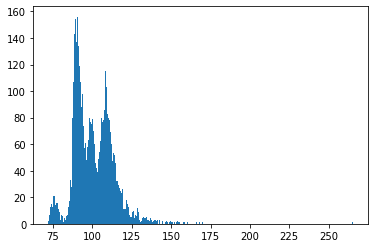

In [22]:
plt.hist(train.y, bins = 300)
plt.show()

In [23]:
# Only one outlier.
train[train.y >= 170]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Drop the outlier
train = train[train.y < 170]

Question 2 - Check for null and unique values for test and train sets.

In [25]:
pd.set_option('display.max_rows', None)
train.isnull().sum()

<IPython.core.display.Javascript object>

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
X33     0
X34     0
X35     0
X36     0
X37     0
X38     0
X39     0
X40     0
X41     0
X42     0
X43     0
X44     0
X45     0
X46     0
X47     0
X48     0
X49     0
X50     0
X51     0
X52     0
X53     0
X54     0
X55     0
X56     0
X57     0
X58     0
X59     0
X60     0
X61     0
X62     0
X63     0
X64     0
X65     0
X66     0
X67     0
X68     0
X69     0
X70     0
X71     0
X73     0
X74     0
X75     0
X76     0
X77     0
X78     0
X79     0
X80     0
X81     0
X82     0
X83     0
X84     0
X85     0
X86     0
X87     0
X88     0
X89     0
X90     0
X91     0
X92     0
X94     0
X95     0
X96     0
X97     0
X98     0
X99     0
X100    0
X101    0
X102    0
X103    0


In [26]:
test.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
X33     0
X34     0
X35     0
X36     0
X37     0
X38     0
X39     0
X40     0
X41     0
X42     0
X43     0
X44     0
X45     0
X46     0
X47     0
X48     0
X49     0
X50     0
X51     0
X52     0
X53     0
X54     0
X55     0
X56     0
X57     0
X58     0
X59     0
X60     0
X61     0
X62     0
X63     0
X64     0
X65     0
X66     0
X67     0
X68     0
X69     0
X70     0
X71     0
X73     0
X74     0
X75     0
X76     0
X77     0
X78     0
X79     0
X80     0
X81     0
X82     0
X83     0
X84     0
X85     0
X86     0
X87     0
X88     0
X89     0
X90     0
X91     0
X92     0
X94     0
X95     0
X96     0
X97     0
X98     0
X99     0
X100    0
X101    0
X102    0
X103    0
X104    0


There are no null values

In [27]:
train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
X3       object
X4       object
X5       object
X6       object
X8       object
X10       int64
X12       int64
X13       int64
X14       int64
X15       int64
X16       int64
X17       int64
X18       int64
X19       int64
X20       int64
X21       int64
X22       int64
X23       int64
X24       int64
X26       int64
X27       int64
X28       int64
X29       int64
X30       int64
X31       int64
X32       int64
X33       int64
X34       int64
X35       int64
X36       int64
X37       int64
X38       int64
X39       int64
X40       int64
X41       int64
X42       int64
X43       int64
X44       int64
X45       int64
X46       int64
X47       int64
X48       int64
X49       int64
X50       int64
X51       int64
X52       int64
X53       int64
X54       int64
X55       int64
X56       int64
X57       int64
X58       int64
X59       int64
X60       int64
X61       int64
X62       int64
X63       int64
X64     

In [ ]:
ids=test['ID'].values
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

In [32]:
train.shape
test.shape

(4208, 365)

(4209, 364)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Categorical feature X0 - Cardinality 47')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Feature value')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Occurences')

<IPython.core.display.Javascript object>

<BarContainer object of 47 artists>

<IPython.core.display.Javascript object>

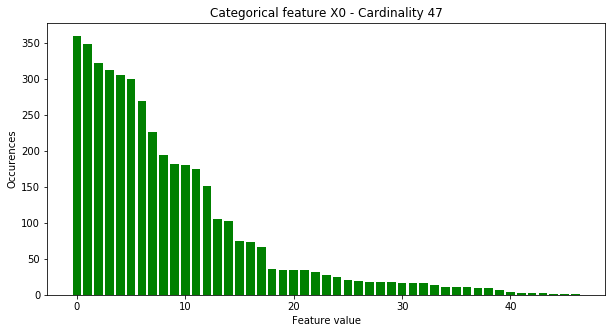

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Categorical feature X1 - Cardinality 27')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Feature value')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Occurences')

<IPython.core.display.Javascript object>

<BarContainer object of 27 artists>

<IPython.core.display.Javascript object>

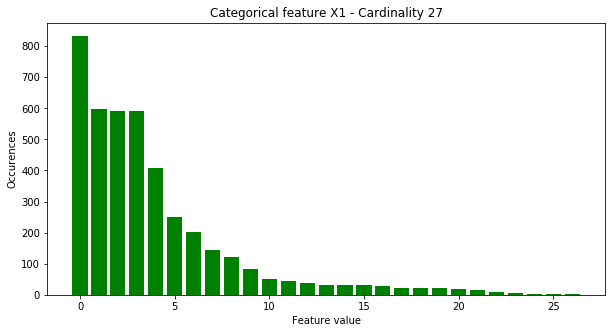

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Categorical feature X2 - Cardinality 44')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Feature value')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Occurences')

<IPython.core.display.Javascript object>

<BarContainer object of 44 artists>

<IPython.core.display.Javascript object>

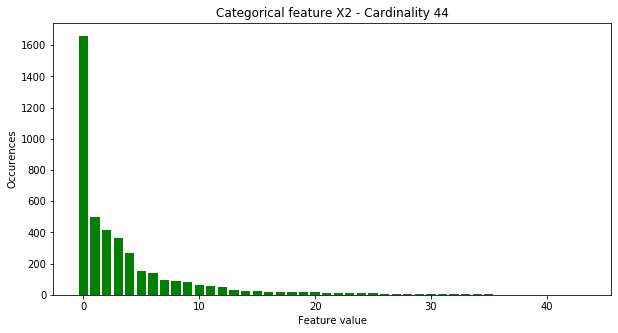

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Categorical feature X3 - Cardinality 7')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Feature value')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Occurences')

<IPython.core.display.Javascript object>

<BarContainer object of 7 artists>

<IPython.core.display.Javascript object>

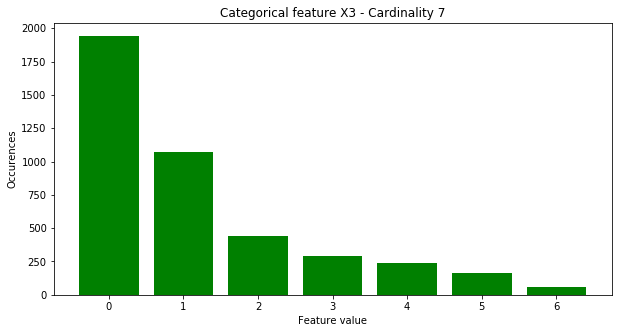

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Categorical feature X4 - Cardinality 4')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Feature value')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Occurences')

<IPython.core.display.Javascript object>

<BarContainer object of 4 artists>

<IPython.core.display.Javascript object>

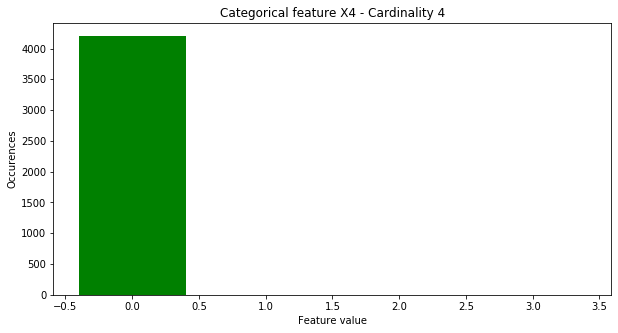

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Categorical feature X5 - Cardinality 29')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Feature value')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Occurences')

<IPython.core.display.Javascript object>

<BarContainer object of 29 artists>

<IPython.core.display.Javascript object>

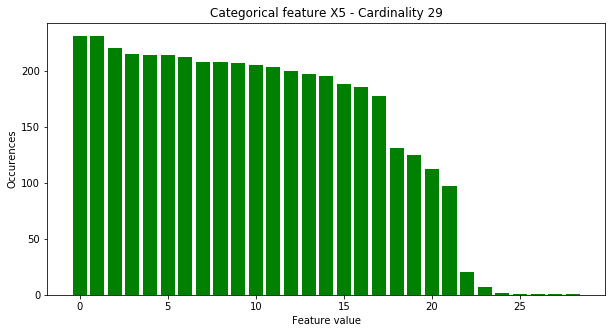

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Categorical feature X6 - Cardinality 12')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Feature value')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Occurences')

<IPython.core.display.Javascript object>

<BarContainer object of 12 artists>

<IPython.core.display.Javascript object>

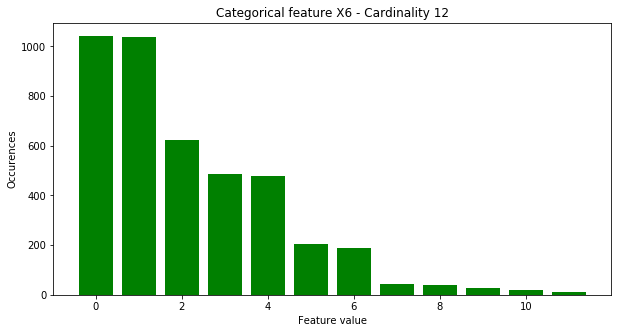

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Categorical feature X8 - Cardinality 25')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Feature value')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Occurences')

<IPython.core.display.Javascript object>

<BarContainer object of 25 artists>

<IPython.core.display.Javascript object>

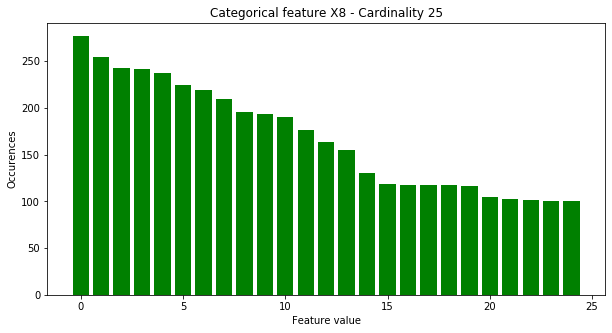

In [37]:
counts = ['X0','X1','X2','X3','X4','X5','X6','X8']
for c in counts:
    value_counts = train[c].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Categorical feature {} - Cardinality {}'.format(c, len(np.unique(train[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values, color='green')
    plt.show()

Question 3 - Apply label encoder

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()

In [40]:
selected_col = ['X0','X1','X2','X3','X4','X5','X6','X8']

In [41]:
train[selected_col] = train[selected_col].apply(le.fit_transform)

In [42]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test[selected_col] = test[selected_col].apply(le.fit_transform)

In [44]:
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


Question 4 - Perform dimensionality reduction.

In [67]:
X=train.drop('y',1)
y = train['y']

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=420, svd_solver="full")

pca.fit_transform(X)
pca2_results_train = pca.transform(X)
pca.fit_transform(test)
pca2_results_test = pca.transform(test)

array([[  0.61325057,  -0.13203749,  15.62320743, ...,   1.73591893,
          0.30218479,   0.35708861],
       [  0.5623539 ,   1.55995547,  17.90960556, ...,  -0.14042769,
          0.764183  ,  -0.36651985],
       [ 16.19726902,  12.29772577,  17.63231972, ...,  -0.47744916,
         -1.03904357,   3.90910093],
       ...,
       [ 29.00026078,  14.87024727,  -7.75791532, ...,  -1.10506062,
          1.39465156,  -0.3594511 ],
       [ 22.97364899,   1.69463791,  -9.03571813, ...,   0.24906159,
          1.28063201,  -1.10699568],
       [-17.276438  ,  -9.94919103,  -3.72555895, ...,   0.28634642,
          0.43834723,  -0.71744334]])

array([[ 14.58336183,  14.16672593,  13.53857566, ...,   0.54966157,
          1.32972887,   3.71598127],
       [-15.25161267,  -7.73675643,  -7.45495068, ...,   0.35225051,
         -0.7342514 ,  -0.50190277],
       [ 11.8564649 ,  -1.68017324,  -9.9896148 , ...,   0.63588481,
          0.35685006,   3.40766663],
       ...,
       [-13.44644008,   3.2885825 ,  -6.85236431, ...,   0.6032804 ,
         -0.6111964 ,  -0.04904791],
       [ 24.92612317,  -4.89888683, -10.16941028, ...,  -1.16547784,
         -0.50253802,  -0.07708958],
       [-15.38430989,  -7.73425491, -15.4930104 , ...,  -1.41274459,
         -1.8048238 ,   0.09375046]])

In [110]:
pca.explained_variance_ratio_
pca.n_components_

array([0.4351543 , 0.17671029, 0.13646395, 0.10977994, 0.08622272,
       0.01433973, 0.00722971, 0.00406846, 0.00274009, 0.00228114,
       0.00221527, 0.00182722])

12

In [111]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

<IPython.core.display.Javascript object>

<BarContainer object of 12 artists>

Text(0, 0.5, 'Percentage of explained variable')

Text(0.5, 0, 'principle component')

Text(0.5, 1.0, 'screen plot')

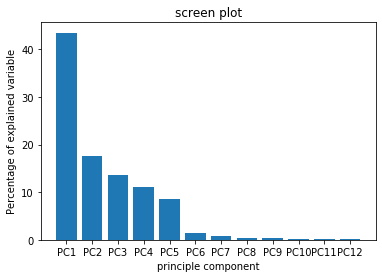

In [112]:
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variable')
plt.xlabel('principle component')
plt.title('screen plot')
plt.show()

Question 5 - Using xgboost model for predictions

In [113]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_valid, y_train, y_valid = train_test_split(
        pca2_results_train, 
        y, test_size=0.2, 
        random_state=101)

In [115]:
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(pca.transform(test))
#d_test = xgb.DMatrix(pca2_results_test)

In [189]:
params = {}
params['objective'] = 'reg:linear'
params['max_depth'] = 4
params['eta'] = 0.04
params['alpha']= 100
params['lambda'] = 1000

In [190]:
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]

In [191]:
clf = xgb.train(params, d_train, 
                800, watchlist, early_stopping_rounds=50, 
                feval=xgb_r2_score, maximize=True, verbose_eval=50)

[20:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:97.74249	valid-rmse:98.22109	train-r2:-60.08364	valid-r2:-65.17751
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[50]	train-rmse:23.63791	valid-rmse:23.85334	train-r2:-2.57253	valid-r2:-2.90300
[100]	train-rmse:11.94992	valid-rmse:11.98463	train-r2:0.08696	valid-r2:0.01474
[150]	train-rmse:10.14872	valid-rmse:10.13537	train-r2:0.34146	valid-r2:0.29534
[200]	train-rmse:9.49244	valid-rmse:9.53204	train-r2:0.42388	valid-r2:0.37674
[250]	train-rmse:9.15699	valid-rmse:9.26711	train-r2:0.46388	valid-r2:0.41090
[300]	train-rmse:8.94722	valid-rmse:9.13581	train-r2:0.48816	valid-r2:0.42747
[350]	train-rmse:8.79597	valid-rmse:9.05196	train-r2:0.50532	valid-r2:0.43794
[400]	train-rmse:8.67842	valid-rmse:8.98580	tra

Predicting the values using xgboost

In [193]:
model = pd.DataFrame()
model['ID'] = ids
model['y'] = clf.predict(d_test)
model.to_csv('xgb.csv', index=False)

model.head(10)

<IPython.core.display.Javascript object>

,ID,y
0,1,74.660828
1,2,98.595810
2,3,79.750877
3,4,73.226639
4,5,106.559189
5,8,89.485184
6,10,97.981812
7,11,98.080162
8,12,108.352051
9,14,102.271957
